In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from agots.multivariate_generators.multivariate_variance_outlier_generator import MultivariateVarianceOutlierGenerator

In [4]:
df = pd.read_csv('C:/Users/ufoio/Documents/AI/Signal/dataset/ydata-labeled-time-series-anomalies-v1_0/A4Benchmark/A4Benchmark_all.csv')
df.head()

,timestamps,A4Benchmark-TS1,A4Benchmark-TS2,A4Benchmark-TS3,A4Benchmark-TS4,A4Benchmark-TS5,A4Benchmark-TS6,A4Benchmark-TS7,A4Benchmark-TS8,A4Benchmark-TS9,...,A4Benchmark-TS91,A4Benchmark-TS92,A4Benchmark-TS93,A4Benchmark-TS94,A4Benchmark-TS95,A4Benchmark-TS96,A4Benchmark-TS97,A4Benchmark-TS98,A4Benchmark-TS99,A4Benchmark-TS100
0,1.416722e+09,2.889225,4.946131,16.049948,-6.129439,-104.190784,-56.564108,129.420420,2.405428,-14.366646,...,-63.304891,-28.253893,-169.457082,-42.716640,25.968349,-20.883760,134.126741,17.647296,-6.165484,-10.258903
1,1.416726e+09,112.492219,177.315568,336.599200,251.488637,533.741817,298.485870,516.763295,59.370193,189.768989,...,110.404803,125.360218,633.018826,335.468188,534.965351,509.367341,281.787837,247.829374,76.609465,141.132619
2,1.416730e+09,131.097056,276.682476,547.794761,645.865406,1023.166673,673.485226,1225.029720,105.042976,369.832887,...,152.500637,177.409450,1126.379471,553.250957,997.258023,790.261057,432.315596,425.722536,119.472792,260.483286
3,1.416733e+09,128.208836,351.276213,706.897846,834.902321,1118.788397,689.796810,1286.487505,141.459338,531.269994,...,172.375913,314.797132,1205.146926,701.996117,1341.994278,1034.526824,632.952734,500.590942,112.542382,319.502977
4,1.416737e+09,121.639029,337.027992,696.496354,891.027367,1154.433098,770.085478,890.448544,126.544480,389.602217,...,134.924514,205.162192,918.554680,719.198804,1298.139691,1087.035935,547.288782,614.081015,181.057282,346.294528


In [5]:
ts = df.iloc[:1000][['A4Benchmark-TS3']]

In [13]:
from agots.multivariate_generators.multivariate_data_input import MultivariateDataInput

In [14]:
tmp = pd.DataFrame([0]*1000)

In [18]:
data_input = MultivariateDataInput(tmp)

In [19]:
T = len(tmp)/20

data_input.add_outliers({'freq':   [{'n': 0, 'timestamps': [(300, 400)], 'freq':1/T, 'amplitude':1000}],
                         'shift':   [{'n': 0, 'timestamps': [(200, 300)]}],
                         'variance':   [{'n': 0, 'timestamps': [(50, 120)]}],
                         'trend':   [{'n': 0, 'timestamps': [(400, 500)], 'factor' : 100}],
                         'extreme' : [{'n': 0, 'timestamps': [(450,)]}]
                        })

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
995,990.0
996,990.0
997,990.0
998,990.0


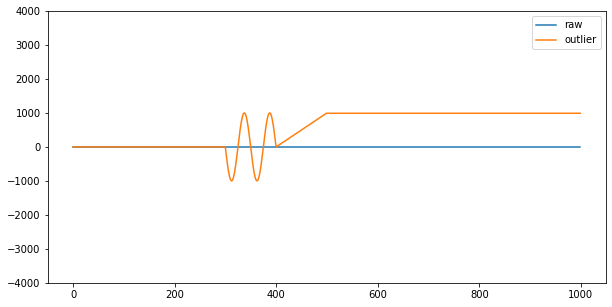

In [20]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_ylim(-4000, 4000)
ax.plot(data_input.data, label='raw')
ax.plot(data_input.outlier_data, label='outlier')
#ax.plot(data_input.outlier_data+1000, label='outlier+1000 to compare')

ax.legend()